## Data Exploration

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [2]:
# load dataset
cleaned_df= pd.read_csv('~/Desktop/OmdenaMLops/A4_Solar_Energy_Project/Data/Cleaned_Casablanca_Morocco_Solcast_PT60M.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2018-12-31,12,2018-12-31,14.654545,11.209091,67.363636,1005.754545,87.090909,1.936364,599.363636,58.454545,305.000000
1,2019-01-01,1,2019-01-01,15.000000,8.781818,66.181818,1009.609091,180.909091,1.300000,538.636364,71.272727,297.272727
2,2019-01-02,1,2019-01-02,14.045455,9.809091,73.272727,1008.954545,189.636364,1.145455,467.363636,93.545455,285.818182
3,2019-01-03,1,2019-01-03,13.509091,8.109091,72.909091,1005.318182,51.272727,2.763636,646.181818,51.727273,315.545455
4,2019-01-04,1,2019-01-04,13.836364,7.236364,70.363636,1006.436364,56.000000,2.027273,659.272727,49.545455,319.454545


In [3]:
# Descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,6.506862,20.022787,18.848008,63.967983,1006.330693,182.413761,3.685710,425.570028,135.262643,393.810412
std,3.443314,3.721850,5.961071,8.848051,5.382032,107.057878,1.349189,204.064315,59.570611,111.156698
min,1.000000,11.890909,5.672727,27.500000,988.033333,5.133333,0.818182,0.000000,42.818182,47.090909
25%,4.000000,17.007692,14.781818,59.583333,1003.581818,55.454545,2.818182,270.666667,89.400000,315.818182
50%,7.000000,19.866667,18.525000,65.214286,1006.338462,226.000000,3.500000,467.363636,122.909091,406.285714
75%,9.000000,23.030769,22.520000,69.692308,1009.245455,270.181818,4.346667,599.727273,174.181818,486.785714
max,12.000000,31.366667,39.576923,88.272727,1021.090909,350.500000,11.100000,768.000000,337.307692,577.800000


In [4]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_DHI          0
Daily_radiation    0
dtype: int64

In [5]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 12 columns):
Unnamed: 0         1093 non-null object
MonthPE            1093 non-null int64
Date               1093 non-null object
Daily_Temp         1093 non-null float64
Daily_Precip       1093 non-null float64
Daily_Humidity     1093 non-null float64
Daily_Pressure     1093 non-null float64
Daily_WindDir      1093 non-null float64
Daily_WindSpeed    1093 non-null float64
Daily_DNI          1093 non-null float64
Daily_DHI          1093 non-null float64
Daily_radiation    1093 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 102.5+ KB


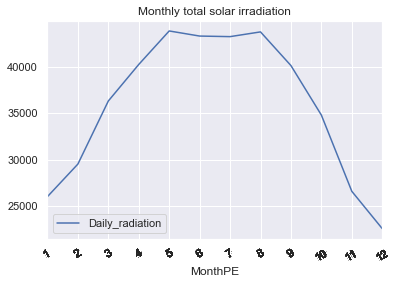

In [6]:
# A plot pf total irriadtion for each 
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

In [ ]:
# Daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

plt.show()
ax.legend()

In [ ]:
# Histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

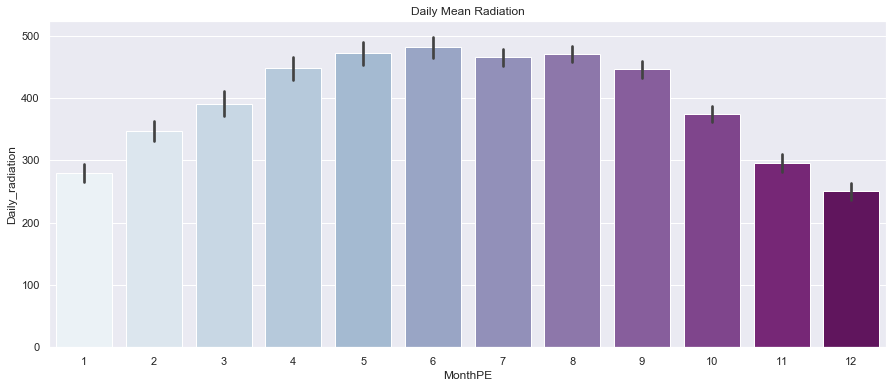

In [17]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

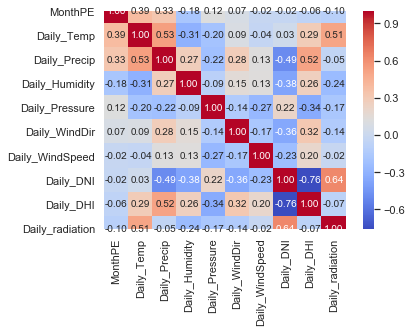

In [18]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

### Statistical check: stationary or non-stationary

In [24]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

ADF Statistic: -1.852978
p-value: 0.354495
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
